>### 模型改进
- 核心模型\
    上篇中，单维度逻辑回归模型为
    $$
    \widehat y^{(i)} = \sigma(x^{(i)} \omega+b)
    $$
    其中的$x^{(i)}$表示第i个样本的维度，对于多维度，输入要变为8个维度的输入因此，模型应当变为
    $$
    \widehat y^{(i)} = \sigma(\sum _{n=1}^8 x^{(i)}_n \omega _n+b)
    $$
    其中的$x^{(i)}_n$表示第i个样本的第n个维度。由于在实际代码运算中是以矩阵进行计算的，因此其中
    $$
    \sum _{n=1}^8 x^{(i)}_n \omega _n = 
    \begin{bmatrix}
    {x_1^{(i)}}&{\cdots}&{x_8^{(i)}}
    \end{bmatrix}
    \begin{bmatrix}
    {w_1}\\
    {\vdots}\\
    {w_8}
    \end{bmatrix}
    $$
    则原式可以表示成
    $$
    \widehat y^{(i)} = \sigma(
    \begin{bmatrix}
    {x_1^{(i)}}&{\cdots}&{x_8^{(i)}}
    \end{bmatrix}
    \begin{bmatrix}
    {w_1}\\
    {\vdots}\\
    {w_8}
    \end{bmatrix}+b)\\
    =\sigma(z^{(i)})
    $$

- Mini Batch\
  pytorch中的sigmoid函数，是一种按向量计算的函数。即
    $$
    \begin{bmatrix}
    {\widehat y^{(1)}}\\
    {\vdots}\\
    {\widehat y^{(N)}}
    \end{bmatrix}
    =
    \begin{bmatrix}
    {\sigma(z^{(1)})}\\
    {\vdots}\\
    {\sigma(z^{(N)})}
    \end{bmatrix}
    =\sigma(
    \begin{bmatrix}
    {z^{(1)}}\\
    {\vdots}\\
    {z^{(N)}}
    \end{bmatrix})
    $$
    其中
    $$
    z^{(i)} = 
    \begin{bmatrix}
    {x_1^{(i)}}&{\cdots}&{x_8^{(i)}}
    \end{bmatrix}
    \begin{bmatrix}
    {w_1}\\
    {\vdots}\\
    {w_8}
    \end{bmatrix}+b\\
    $$
    则
    $$
    \begin{bmatrix}
    {z^{(1)}}\\
    {\vdots}\\
    {z^{(N)}}
    \end{bmatrix}
    =
    \begin{bmatrix}
    {x_1^{(1)}} & {\cdots} & {x_8^{(1)}}\\
    {\vdots} & {\vdots} & {\vdots}\\
    {x_1^{(N)}} & {\cdots} & {x_8^{(N)}}\\
    \end{bmatrix}
    \begin{bmatrix}
    {w_1}\\
    {\vdots}\\
    {w_8}
    \end{bmatrix}
    +
    \begin{bmatrix}
    {b}\\
    {\vdots}\\
    {b}
    \end{bmatrix}
    $$
    整体上将原先的标量运算，转换为矩阵运算，以方便进行并行计算，提高算法效率。

>### 网络增加
**神经网络——寻找非线性的空间变换函数，因此需要多个权重矩阵进行线性空间变换的近似**
<image>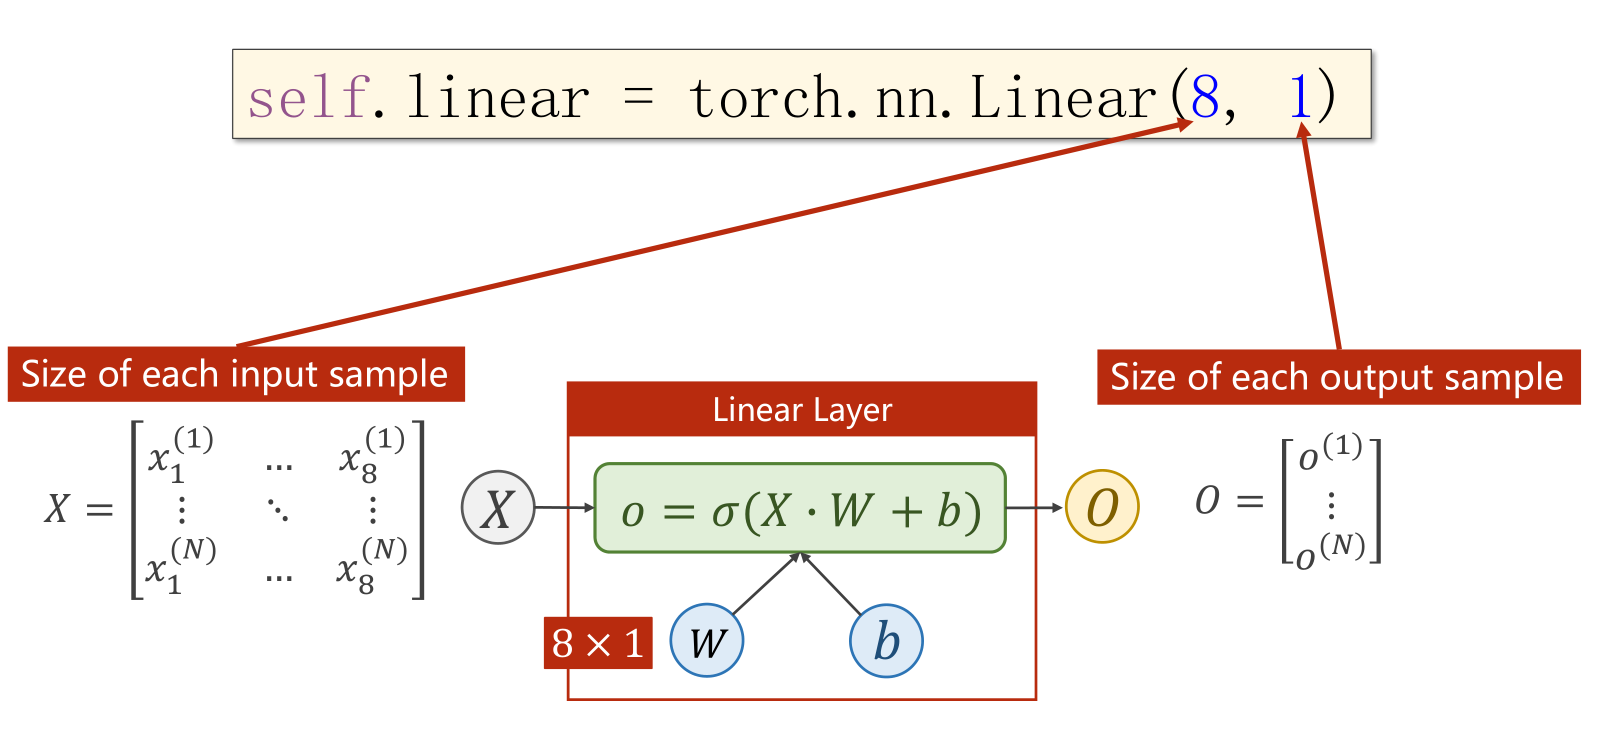</image>
由此，也可以将输出的部分转换为其他维度，来实现分布的维度下降，比如8维转6维，6维转4维，4维转1维，由此可以增加网络层数，增加网络复杂度。同理，对网络结构先增后减也是可以的。
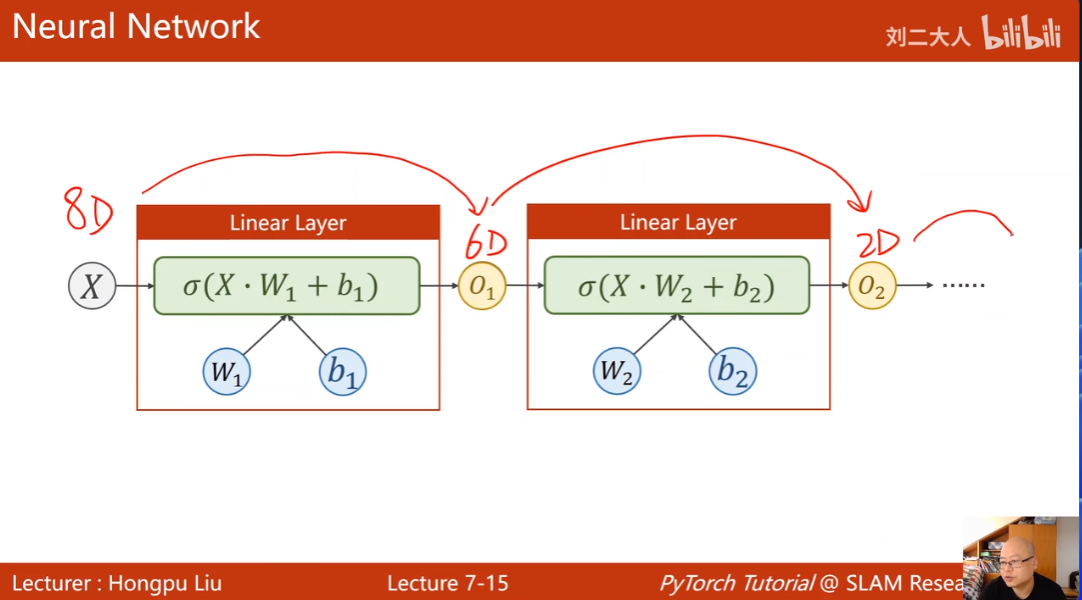

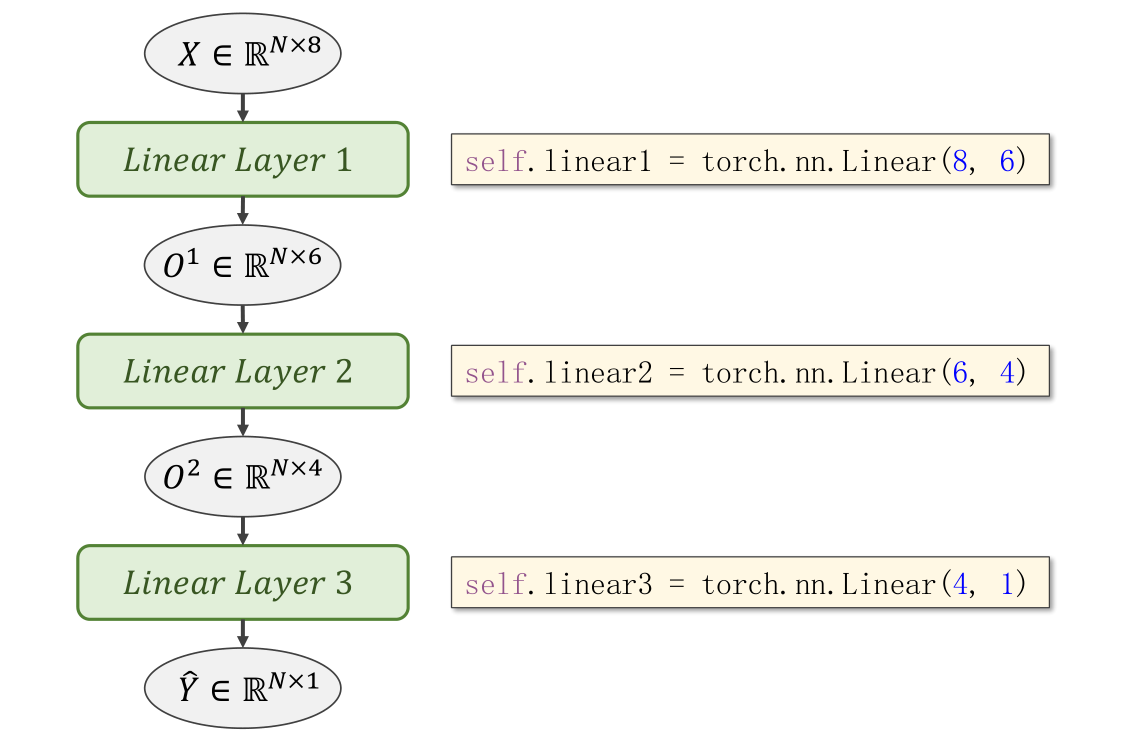

In [9]:
import torch
import numpy as np

xy = np.loadtxt('diabetes.csv',delimiter=',', dtype=np.float32)
#-1行-1列不取
x_data = torch.from_numpy(xy[:-1, :-1])
#单取-1列作为矩阵
y_data = torch.from_numpy(xy[:-1, [-1]])
#取-1行的测试集部分
test_data = torch.from_numpy(xy[[-1], :-1])
pred_test = torch.from_numpy(xy[[-1],[-1]])

class LinearModel(torch.nn.Module):
    def __init__(self) -> None:
        super().__init__()
        self.linear1 = torch.nn.Linear(8,6)
        self.linear2 = torch.nn.Linear(6,4)
        self.linear3 = torch.nn.Linear(4,1)
        self.sigmoid = torch.nn.Sigmoid()

    def forward(self, x):
        x = self.sigmoid(self.linear1(x))
        x = self.sigmoid(self.linear2(x))
        x = self.sigmoid(self.linear3(x))
        return x

model = LinearModel()

criterion = torch.nn.BCELoss(size_average=True)
optimizer = torch.optim.SGD(model.parameters(), lr=0.1)

for epoch in range(1000):
    # forward
    y_pred = model(x_data)
    loss = criterion(y_pred, y_data)
    print(epoch, loss.item())   

    # backward
    optimizer.zero_grad()
    loss.backward()

    # update
    optimizer.step()

print("test_pred = ", model(test_data).item())
print("infact_pred = ", pred_test.item())


0 0.6483415961265564
1 0.6481255292892456
2 0.647926926612854
3 0.6477444767951965
4 0.6475767493247986
5 0.6474225521087646
6 0.6472806334495544
7 0.6471503376960754
8 0.6470304131507874
9 0.6469201445579529
10 0.6468187570571899
11 0.6467254757881165
12 0.6466396450996399
13 0.6465606689453125
14 0.6464879512786865
15 0.6464210748672485
16 0.6463595032691956
17 0.6463027596473694
18 0.6462506651878357
19 0.646202564239502
20 0.6461583375930786
21 0.6461175680160522
22 0.6460800170898438
23 0.6460453867912292
24 0.6460134983062744
25 0.6459840536117554
26 0.6459569931030273
27 0.6459320187568665
28 0.6459089517593384
29 0.6458876729011536
30 0.6458680629730225
31 0.6458499431610107
32 0.6458331942558289
33 0.645817756652832
34 0.6458035111427307
35 0.6457903385162354
36 0.6457780599594116
37 0.6457667350769043
38 0.6457563042640686
39 0.645746648311615
40 0.6457376480102539
41 0.6457294225692749
42 0.6457216739654541
43 0.6457145810127258
44 0.645707905292511
45 0.6457017660140991
46 